# Video Transcription and Annotation

## Setup

In [1]:
import os
import glob
import pandas as pd

#from moviepy.editor import *
import moviepy.editor as mp

import whisper

### Set Directories

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/net/'
data_dir = proj_dir+'derivatives/task-naturalistic/stimuli/'
outp_dir = proj_dir+'derivatives/speech_analysis/'

os.chdir(proj_dir)

In [152]:
clip_name='partly_cloudy_hd'

In [153]:
video_clip = mp.VideoFileClip(data_dir+clip_name+'.avi')
# Extract the audio from the video clip
audio_clip = video_clip.audio

In [154]:
video_clip.fps

29.97002997002997

In [158]:
audio_clip

In [157]:
# Extract the audio segment from the video
#audio_segment = video_clip.subclip(current_time, current_time + remaining_duration)
audio_clip = video_clip.audio
audio_path = outp_dir+clip_name+'.wav'
audio_clip.write_audiofile(audio_path, codec='pcm_s16le')

AttributeError: 'NoneType' object has no attribute 'write_audiofile'

In [7]:
model = whisper.load_model("small")
result = model.transcribe(audio_path, word_timestamps=True)
print(result["text"])

 When you look at me, you probably see a guy who has it all. But really, there's a large part of me that's immature and underdeveloped, especially when it comes to women. Every girl I liked growing up rejected me, and because of that, I've grown into a man who is chronically nervous around women. I'm an emotional midget. Now, if someone came to me with this problem, I'd suggest immersion therapy, where you overwhelm yourself with your fear in order to overcome it. So tonight, to inspire you, I'm going to attempt to overcome my fear of the opposite sex by dating not one, but ten women at the same time. Wish me luck. I needed to get ten women to agree to date me, so I thought it'd be easy to start with someone I work with. So, you know how I'm doing the thing on the show where I'm dating, like, ten women at the same time? Yeah. You're in a relationship right now? Yes. Okay. So, sorry, never mind. That's a stupid task. It didn't work, and I knew from experience that women just wouldn't st

In [8]:
transcript_ts = pd.DataFrame(columns=['Text','Start_time','End_time'])

for idx in range(len(result['segments'])):
    transcript_ts.loc[idx, 'Text'] = result['segments'][idx]['text']
    transcript_ts.loc[idx, 'Start_time'] = result['segments'][idx]['start']
    transcript_ts.loc[idx, 'End_time'] = result['segments'][idx]['end']



In [9]:
transcript_ts

,Text,Start_time,End_time
0,"When you look at me, you probably see a guy w...",0.0,3.2
1,"But really, there's a large part of me that's...",3.8,8.32
2,especially when it comes to women.,8.38,10.4
3,"Every girl I liked growing up rejected me,",11.58,14.0
4,"and because of that, I've grown into a man wh...",14.34,18.5
...,...,...,...
64,Will they find love?,182.14,183.2
65,Will they find their soulmate?,183.74,185.18
66,I'm Anthony Napoli.,185.82,186.84
67,This is The Hunk.,187.3,188.66


# Sentiment Analysis

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hpopal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hpopal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def preprocess(text):
    # Lowercase and then tokenize (split into words) the text
    tokens = word_tokenize(text.lower())

    # Remove stop words (common words with minimal content - mostly grammatical words)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens (reduce words to base lemmas - i.e., form found in dictionary)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [13]:
analyzer = SentimentIntensityAnalyzer()
def polarity(text):
    pol = analyzer.polarity_scores(text)
    return pol

In [159]:
cleaned_text = preprocess(transcript_ts.loc[0,'Text'])
cleaned_text

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


'look , probably see guy .'

In [15]:
polarity(cleaned_text)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
for i_row in range(len(transcript_ts)):
    cleaned_text = preprocess(transcript_ts.loc[i_row,'Text'])
    transcript_ts.loc[i_row,'Text_clean'] = cleaned_text

    temp_sent = polarity(cleaned_text)
    transcript_ts.loc[i_row,'neg'] = temp_sent['neg']
    transcript_ts.loc[i_row,'neu'] = temp_sent['neu']
    transcript_ts.loc[i_row,'pos'] = temp_sent['pos']

In [17]:
transcript_ts.head()

,Text,Start_time,End_time,Text_clean,neg,neu,pos
0,"When you look at me, you probably see a guy w...",0.0,3.2,"look , probably see guy .",0.000,1.000,0.000
1,"But really, there's a large part of me that's...",3.8,8.32,"really , 's large part 's immature underdevelo...",0.000,1.000,0.000
2,especially when it comes to women.,8.38,10.4,especially come woman .,0.000,1.000,0.000
3,"Every girl I liked growing up rejected me,",11.58,14.0,"every girl liked growing rejected ,",0.337,0.204,0.459
4,"and because of that, I've grown into a man wh...",14.34,18.5,", 've grown man chronically nervous around wom...",0.259,0.741,0.000


# Create Regressors
Translate features of interest in to regressors with a value for each TR. This can be used to correlate with the reverse correlation significant activations output.

In [21]:
from nilearn.glm.first_level import compute_regressor
import numpy as np

In [22]:
tr = 1.25  # repetition time is 1 second
n_scans = 476  # the acquisition comprises 128 scans
frame_times = np.arange(n_scans) * tr 

In [23]:


# Make onsets like file
events = pd.DataFrame(columns=['trial_type', 'onset', 'duration'])

events['trial_type'] = transcript_ts['Text']
events['onset'] = pd.to_numeric(transcript_ts['Start_time'])
events['duration'] = pd.to_numeric(transcript_ts['End_time'] - transcript_ts['Start_time'])


# Make empty dataframe for feature regressors
features_df = pd.DataFrame(index = frame_times)

features = ['neg','neu','pos']

for feat in features:
    events[feat] = pd.to_numeric(transcript_ts[feat])

    temp_dm = events[['onset','duration',feat]].to_numpy()
    signal_feat, _labels = compute_regressor(temp_dm.T, 'spm', 
                                            frame_times, con_id=feat)

    features_df[feat] = signal_feat
    
features_df.head(20)

,neg,neu,pos
0.00,0.000000,0.000000,0.000000
1.25,0.000000,0.002107,0.000000
2.50,0.000000,0.049596,0.000000
3.75,0.000000,0.210905,0.000000
5.00,0.000000,0.448752,0.000000
6.25,0.000000,0.651059,0.000000
7.50,0.000000,0.796770,0.000000
8.75,0.000000,0.912842,0.000000
10.00,0.000000,1.003534,0.000000
11.25,0.000000,1.059920,0.000000


<Axes: >

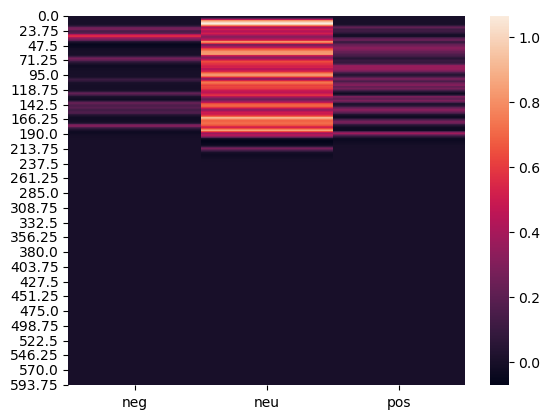

In [24]:
import seaborn as sns
sns.heatmap(features_df)

In [ ]:
# Create Time Series Regressors
from nilearn.glm.first_level import compute_regressor


# Set scan specific parameters
tr = args.TR
n_scans = args.Frames
frame_times = np.arange(n_scans) * tr 


# Make onsets like file
events = pd.DataFrame(columns=['trial_type', 'onset', 'duration'])

events['trial_type'] = transcript_ts['Text']
events['onset'] = pd.to_numeric(transcript_ts['Start_time'])
events['duration'] = pd.to_numeric(transcript_ts['End_time'] - transcript_ts['Start_time'])


# Make empty dataframe for feature regressors
features_df = pd.DataFrame(index = frame_times)

features = ['neg','neu','pos']

for feat in features:
    events[feat] = pd.to_numeric(transcript_ts[feat])

    temp_dm = events[['onset','duration',feat]].to_numpy()
    signal_feat, _labels = compute_regressor(temp_dm.T, 'spm', 
                                            frame_times, con_id=feat)

    features_df[feat] = signal_feat


# Export
features_df.to_csv(outp_dir+'annotations/'+clip_name+'_annotations-fmri.csv')

# Facial Expressions

In [67]:
from feat import Detector

#detector = Detector()

#detector

In [96]:
clip_name

'awkward_hd'

In [82]:
detector = Detector(face_model='retinaface', landmark_model='mobilefacenet', 
                    au_model='svm', emotion_model='resmasknet', facepose_model='img2pose')
Pair1_Q1_s1 = detector.detect_video(data_dir+clip_name+'.avi', skip_frames=30)


INFO:root:Loading Face model: retinaface
  pretrained_dict = torch.load(

INFO:root:Loading Facial Landmark model: mobilefacenet
  checkpoint = torch.load(

INFO:root:Loading facepose model: img2pose
  checkpoint = torch.load(model_path, map_location=self.device)

INFO:root:Loading AU model: svm
INFO:root:Loading emotion model: resmasknet
  torch.load(

INFO:root:Loading Identity model: facenet
  torch.load(

  0%|                                                                             | 0/6251 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (480, 854) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 94, 94]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...


KeyboardInterrupt: 

In [87]:
Pair1_Q1_s1 = Pair1_Q1_s1.reset_index(drop=True)
Pair1_Q1_s1

0         0
1        30
2        60
3        90
4       120
       ... 
281    6120
282    6150
283    6180
284    6210
285    6240
Name: frame, Length: 286, dtype: int64

In [130]:
emotions_df = Pair1_Q1_s1.emotions
emotions_df['frame'] = Pair1_Q1_s1['frame'].to_list()
emotions_df = emotions_df.groupby('frame').mean()
emotions_df = emotions_df.reset_index(drop=True)
emotions_df = emotions_df.reset_index(names=['TR'])
emotions_df.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_df['frame'] = Pair1_Q1_s1['frame'].to_list()



,TR,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0,0.523838,0.005422,0.000744,0.001147,0.028814,0.003860,0.436174
1,1,0.650072,0.001614,0.003041,0.008241,0.005349,0.160102,0.171581
2,2,0.533752,0.000127,0.012869,0.013256,0.001105,0.421653,0.017239
3,3,0.954813,0.009838,0.001204,0.001714,0.001255,0.014287,0.016889
4,4,0.050837,0.009303,0.000274,0.006155,0.040199,0.008456,0.884776


In [111]:
Pair1_Q1_s1[Pair1_Q1_s1['frame'].isin(Pair1_Q1_s1['frame'][Pair1_Q1_s1['frame'].duplicated()])].sort_values("frame")

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_506,Identity_507,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,approx_time
5,447.692408,64.664089,77.191368,107.920400,0.998828,449.988557,449.224375,449.221704,449.711628,451.575551,...,0.036616,0.078287,-0.010244,0.026761,0.088249,-0.041574,-0.010717,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,150,00:05
6,3.748773,219.564382,19.514362,25.271544,0.808828,7.411849,7.028259,6.745092,6.683473,7.068922,...,0.018104,0.015412,0.006812,-0.001873,-0.016877,0.007115,-0.024580,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,150,00:05
36,457.790941,69.413429,93.869729,129.973671,0.993427,458.061479,458.357578,459.702929,461.765079,465.284619,...,0.057754,0.095371,-0.024620,0.015271,0.092067,-0.028009,-0.024832,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,1050,00:35
37,803.962065,127.014300,44.767706,57.767932,0.768863,803.084174,805.574838,808.306177,811.927527,816.901013,...,0.042164,0.010543,-0.003585,0.017855,0.018156,0.030247,-0.031249,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,1050,00:35
38,397.757727,52.063360,96.712246,140.862205,0.993708,397.314217,398.478785,400.630650,403.775405,408.630043,...,0.021586,0.092451,0.000918,0.038088,0.101603,-0.000880,-0.024197,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,1080,00:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,270.471939,72.700984,71.676617,84.707101,0.835024,271.820545,272.608500,274.215789,277.369488,282.868958,...,0.062442,0.042991,0.028393,0.008344,-0.013467,-0.019513,-0.022731,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,5160,02:52
258,398.323498,47.964682,48.022042,62.798916,0.993586,403.197521,403.367342,403.971484,405.234291,407.276846,...,-0.019138,0.033738,-0.072243,0.027850,0.028194,0.011897,-0.040091,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,5490,03:03
259,746.220318,69.959180,43.756592,51.499219,0.777867,745.201521,745.473302,746.180952,747.739725,750.143223,...,0.098497,0.048315,0.018049,-0.003662,-0.030893,0.002319,-0.034782,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,5490,03:03
260,357.633038,89.041599,38.944073,51.613657,0.998396,358.858541,360.173875,361.960979,364.291032,367.481648,...,0.026606,0.081175,-0.022029,0.032703,0.047617,-0.043200,-0.046456,/Users/hpopal/Google Drive/My Drive/dscn_lab/p...,5520,03:04


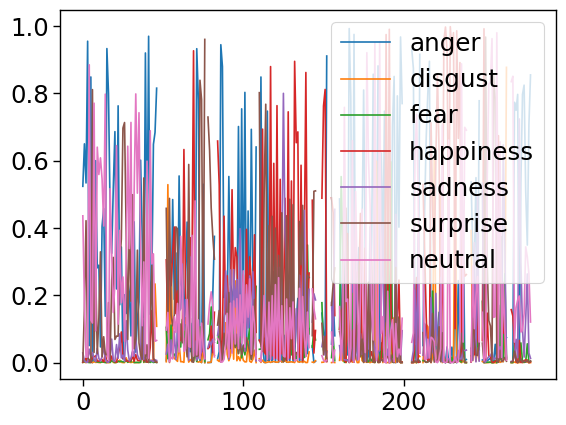

In [93]:
Q1_s1_emotions = Pair1_Q1_s1.emotions.plot()

In [115]:
test = Pair1_Q1_s1.extract_mean().aus
test

,mean_AU01,mean_AU02,mean_AU04,mean_AU05,mean_AU06,mean_AU07,mean_AU09,mean_AU10,mean_AU11,mean_AU12,mean_AU14,mean_AU15,mean_AU17,mean_AU20,mean_AU23,mean_AU24,mean_AU25,mean_AU26,mean_AU28,mean_AU43
0,0.429688,0.335938,0.417969,0.550781,0.039062,0.113281,0.230469,0.054688,0.179688,0.082031,0.574219,0.496094,0.210938,0.042969,0.570312,0.433594,0.433594,0.269531,0.496094,0.5


In [91]:
from feat.plotting import plot_face

plot_face(
    au=Pair1_Q1_s1, # the LDA coefs from the AUs pipeline model
    feature_range=(0, 1),
    muscles={"all": "heatmap"},
    title="Expression reconstructed from\nAU classifier weights",
    title_kwargs={'wrap':False}
);
sns.despine(left=True,bottom=True);

      FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0    476.320931   52.803836      69.003553       95.674585   0.998044   
1    433.270169   50.636216      72.223306       97.582028   0.998007   
2    452.980808   48.061316      71.230131      100.301827   0.998042   
3    424.265213   50.805748      73.555950      101.083048   0.999071   
4    396.072615   62.777371      76.834557      104.863031   0.998382   
..          ...         ...            ...             ...        ...   
281  522.578051  121.089601     120.380001      156.916117   0.998774   
282         NaN         NaN            NaN             NaN        NaN   
283         NaN         NaN            NaN             NaN        NaN   
284         NaN         NaN            NaN             NaN        NaN   
285         NaN         NaN            NaN             NaN        NaN   

            x_0         x_1         x_2         x_3         x_4  ...  \
0    476.563368  477.991824  480.161902  483.021475

ValueError: au vector must be length 20.

In [53]:
video_prediction = detector.detect_video(
    data_dir+clip_name+'.avi', data_type="video", skip_frames=30, face_detection_threshold=0.95
)


  0%|                                                                              | 0/209 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (480, 854) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 94, 94]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 94, 94]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  0%|▎                                                                     | 1/209 [00:01<05:44,  

NameError: name 'Pair1_Q1_s1' is not defined

In [73]:
video_prediction.query

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.523838,0.005422,0.000744,0.001147,0.028814,0.003860,0.436174
30,0.650072,0.001614,0.003041,0.008241,0.005349,0.160102,0.171581
60,0.533752,0.000127,0.012869,0.013256,0.001105,0.421653,0.017239
90,0.954813,0.009838,0.001204,0.001714,0.001255,0.014287,0.016889
120,0.050837,0.009303,0.000274,0.006155,0.040199,0.008456,0.884776
...,...,...,...,...,...,...,...
6120,0.201273,0.000131,0.004291,0.007603,0.011428,0.068011,0.707264
6150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: module 'av' has no attribute 'AVError'

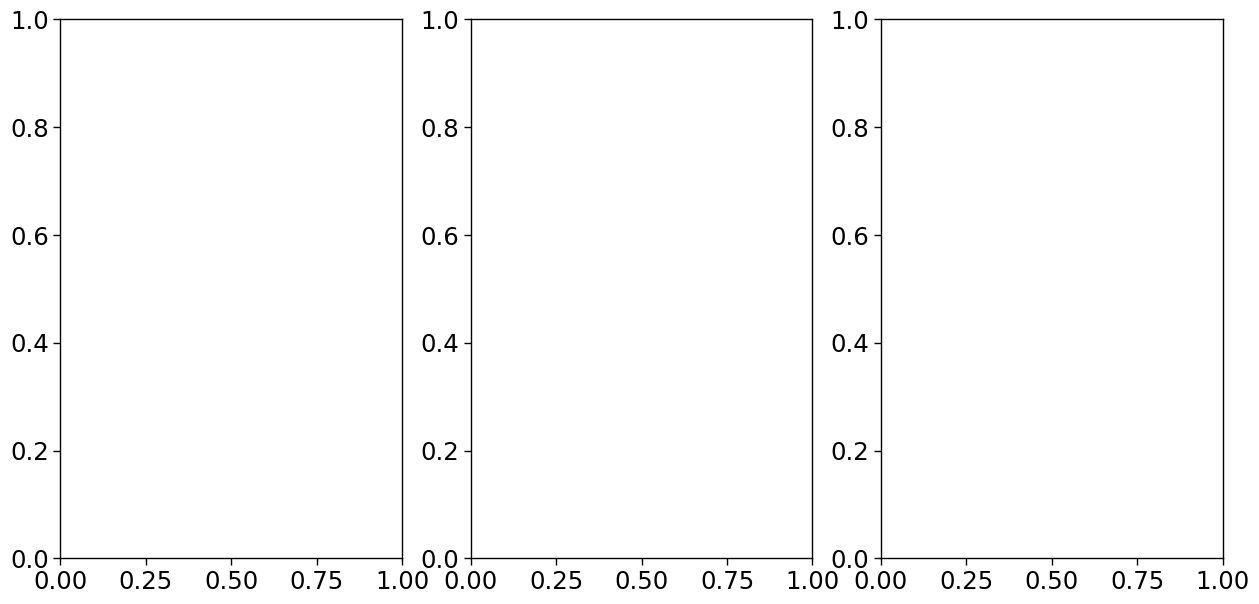

In [92]:
figs = Pair1_Q1_s1.plot_detections(poses=True)

AttributeError: module 'av' has no attribute 'AVError'

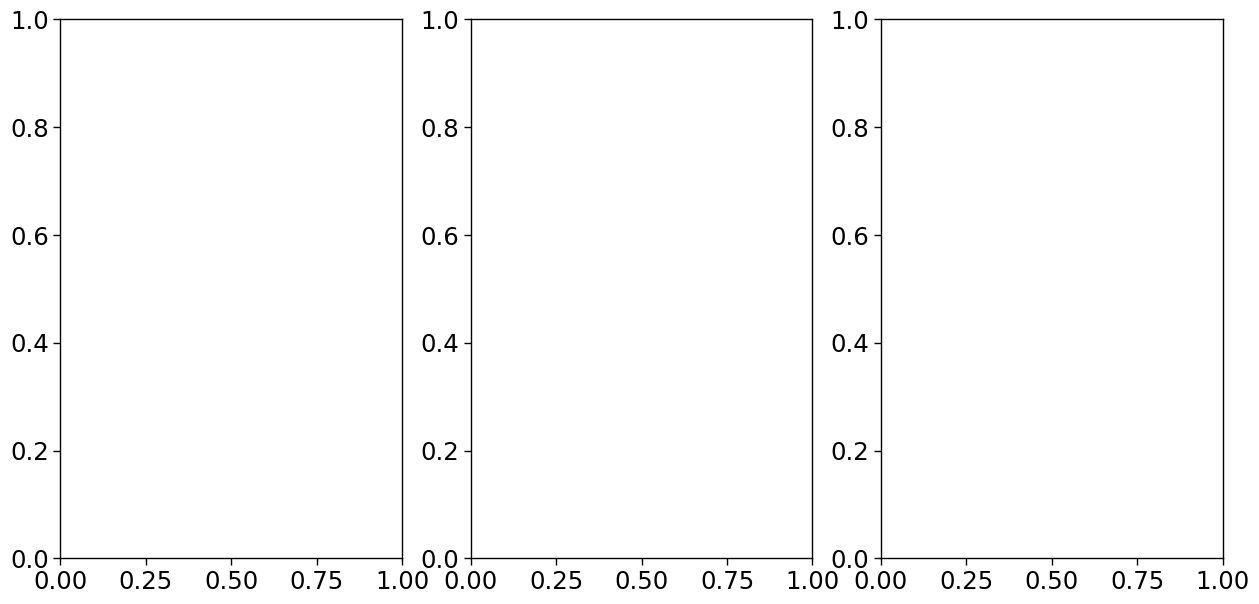

In [114]:
Pair1_Q1_s1.query("frame in [30]").plot_detections(
    faceboxes=True, add_titles=False
)

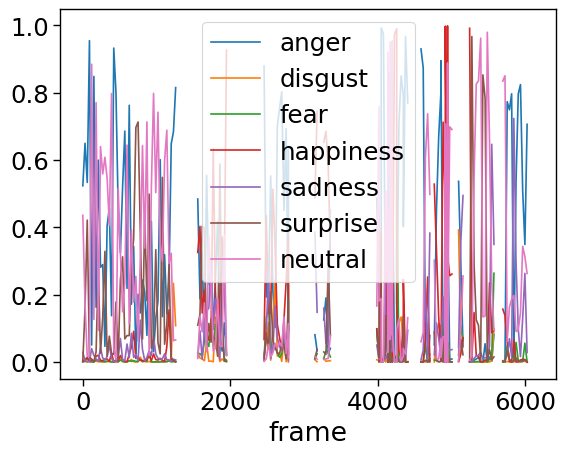

In [45]:
axes = video_prediction.emotions.plot()

# Topic Modeling

In [161]:
import re

# Preprocess the text data
def preprocess_text(text):
    text = re.sub('\s+', ' ', text)  # Remove extra spaces
    text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

transcript_ts['Text_cleaned'] = transcript_ts['Text'].apply(preprocess_text)
transcript_ts['Text_cleaned'].head()

0     when you look at me  you probably see a guy w...
1     but really  theres a large part of me thats i...
2                   especially when it comes to women 
3           every girl i liked growing up rejected me 
4     and because of that  ive grown into a man who...
Name: Text_cleaned, dtype: object

In [162]:
import gensim
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Tokenize and remove stopwords
def tokenize(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

transcript_ts['tokens'] = transcript_ts['Text_cleaned'].apply(tokenize)
transcript_ts['tokens'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hpopal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                           [look, probably, see, guy]
1    [really, theres, large, part, thats, immature,...
2                           [especially, comes, women]
3              [every, girl, liked, growing, rejected]
4    [ive, grown, man, chronically, nervous, around...
Name: tokens, dtype: object

In [163]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

transcript_ts['lemmas'] = transcript_ts['tokens'].apply(lemmatize)
transcript_ts['lemmas'].head()

0                           [look, probably, see, guy]
1    [really, there, s, large, part, that, s, immat...
2                            [especially, come, woman]
3                    [every, girl, like, grow, reject]
4    [I, ve, grow, man, chronically, nervous, aroun...
Name: lemmas, dtype: object

In [164]:
import gensim.corpora as corpora

# Create dictionary and corpus
id2word = corpora.Dictionary(transcript_ts['lemmas'])
texts = transcript_ts['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<175 unique tokens: ['guy', 'look', 'probably', 'see', 'immature']...> from 69 documents (total 313 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<175 unique tokens: ['guy', 'look', 'probably', 'see', 'immature']...> from 69 documents (total 313 corpus positions)", 'datetime': '2025-04-16T15:16:09.837382', 'gensim': '4.3.3', 'python': '3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:33:12) [Clang 15.0.7 ]', 'platform': 'macOS-14.6.1-arm64-arm-64bit', 'event': 'created'}


In [165]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

INFO:gensim.models.ldamodel:using autotuned alpha, starting with [0.33333334, 0.33333334, 0.33333334]
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 69 documents, updating model once every 69 documents, evaluating perplexity every 69 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:-6.650 per-word bound, 100.4 perplexity estimate based on a held-out corpus of 69 documents with 313 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #69/69
INFO:gensim.models.ldamodel:optimized alpha [0.3450989, 0.31874168, 0.34818256]
INFO:gensim.models.ldamodel:topic #0 (0.345): 0.037*"I" + 0.036*"m" + 0.031*"one" + 0.028*"woman" + 0.018*"come" + 0.016*"would" + 0.014*"date" + 0.014*"try" + 0.014*"smoothie" + 0.013*"not"
INFO:gensim.models.lda

In [166]:
# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

INFO:gensim.models.ldamodel:topic #0 (0.165): 0.051*"m" + 0.051*"I" + 0.030*"woman" + 0.028*"one" + 0.019*"come" + 0.018*"date" + 0.018*"okay" + 0.014*"show" + 0.013*"anthony" + 0.013*"napoli"
INFO:gensim.models.ldamodel:topic #1 (0.150): 0.051*"smoothie" + 0.042*"like" + 0.023*"I" + 0.023*"find" + 0.017*"tray" + 0.017*"not" + 0.016*"m" + 0.016*"grow" + 0.016*"new" + 0.016*"raspberry"
INFO:gensim.models.ldamodel:topic #2 (0.168): 0.038*"woman" + 0.032*"need" + 0.026*"would" + 0.020*"move" + 0.020*"way" + 0.020*"hunk" + 0.020*"that" + 0.020*"s" + 0.019*"man" + 0.016*"like"


(0, '0.051*"m" + 0.051*"I" + 0.030*"woman" + 0.028*"one" + 0.019*"come" + 0.018*"date" + 0.018*"okay" + 0.014*"show" + 0.013*"anthony" + 0.013*"napoli"')
(1, '0.051*"smoothie" + 0.042*"like" + 0.023*"I" + 0.023*"find" + 0.017*"tray" + 0.017*"not" + 0.016*"m" + 0.016*"grow" + 0.016*"new" + 0.016*"raspberry"')
(2, '0.038*"woman" + 0.032*"need" + 0.026*"would" + 0.020*"move" + 0.020*"way" + 0.020*"hunk" + 0.020*"that" + 0.020*"s" + 0.019*"man" + 0.016*"like"')


In [176]:
topics

[(0,
  '0.051*"m" + 0.051*"I" + 0.030*"woman" + 0.028*"one" + 0.019*"come" + 0.018*"date" + 0.018*"okay" + 0.014*"show" + 0.013*"anthony" + 0.013*"napoli"'),
 (1,
  '0.051*"smoothie" + 0.042*"like" + 0.023*"I" + 0.023*"find" + 0.017*"tray" + 0.017*"not" + 0.016*"m" + 0.016*"grow" + 0.016*"new" + 0.016*"raspberry"'),
 (2,
  '0.038*"woman" + 0.032*"need" + 0.026*"would" + 0.020*"move" + 0.020*"way" + 0.020*"hunk" + 0.020*"that" + 0.020*"s" + 0.019*"man" + 0.016*"like"')]

In [252]:
# import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk import sent_tokenize, word_tokenize

import matplotlib.pyplot as plt

In [247]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [250]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

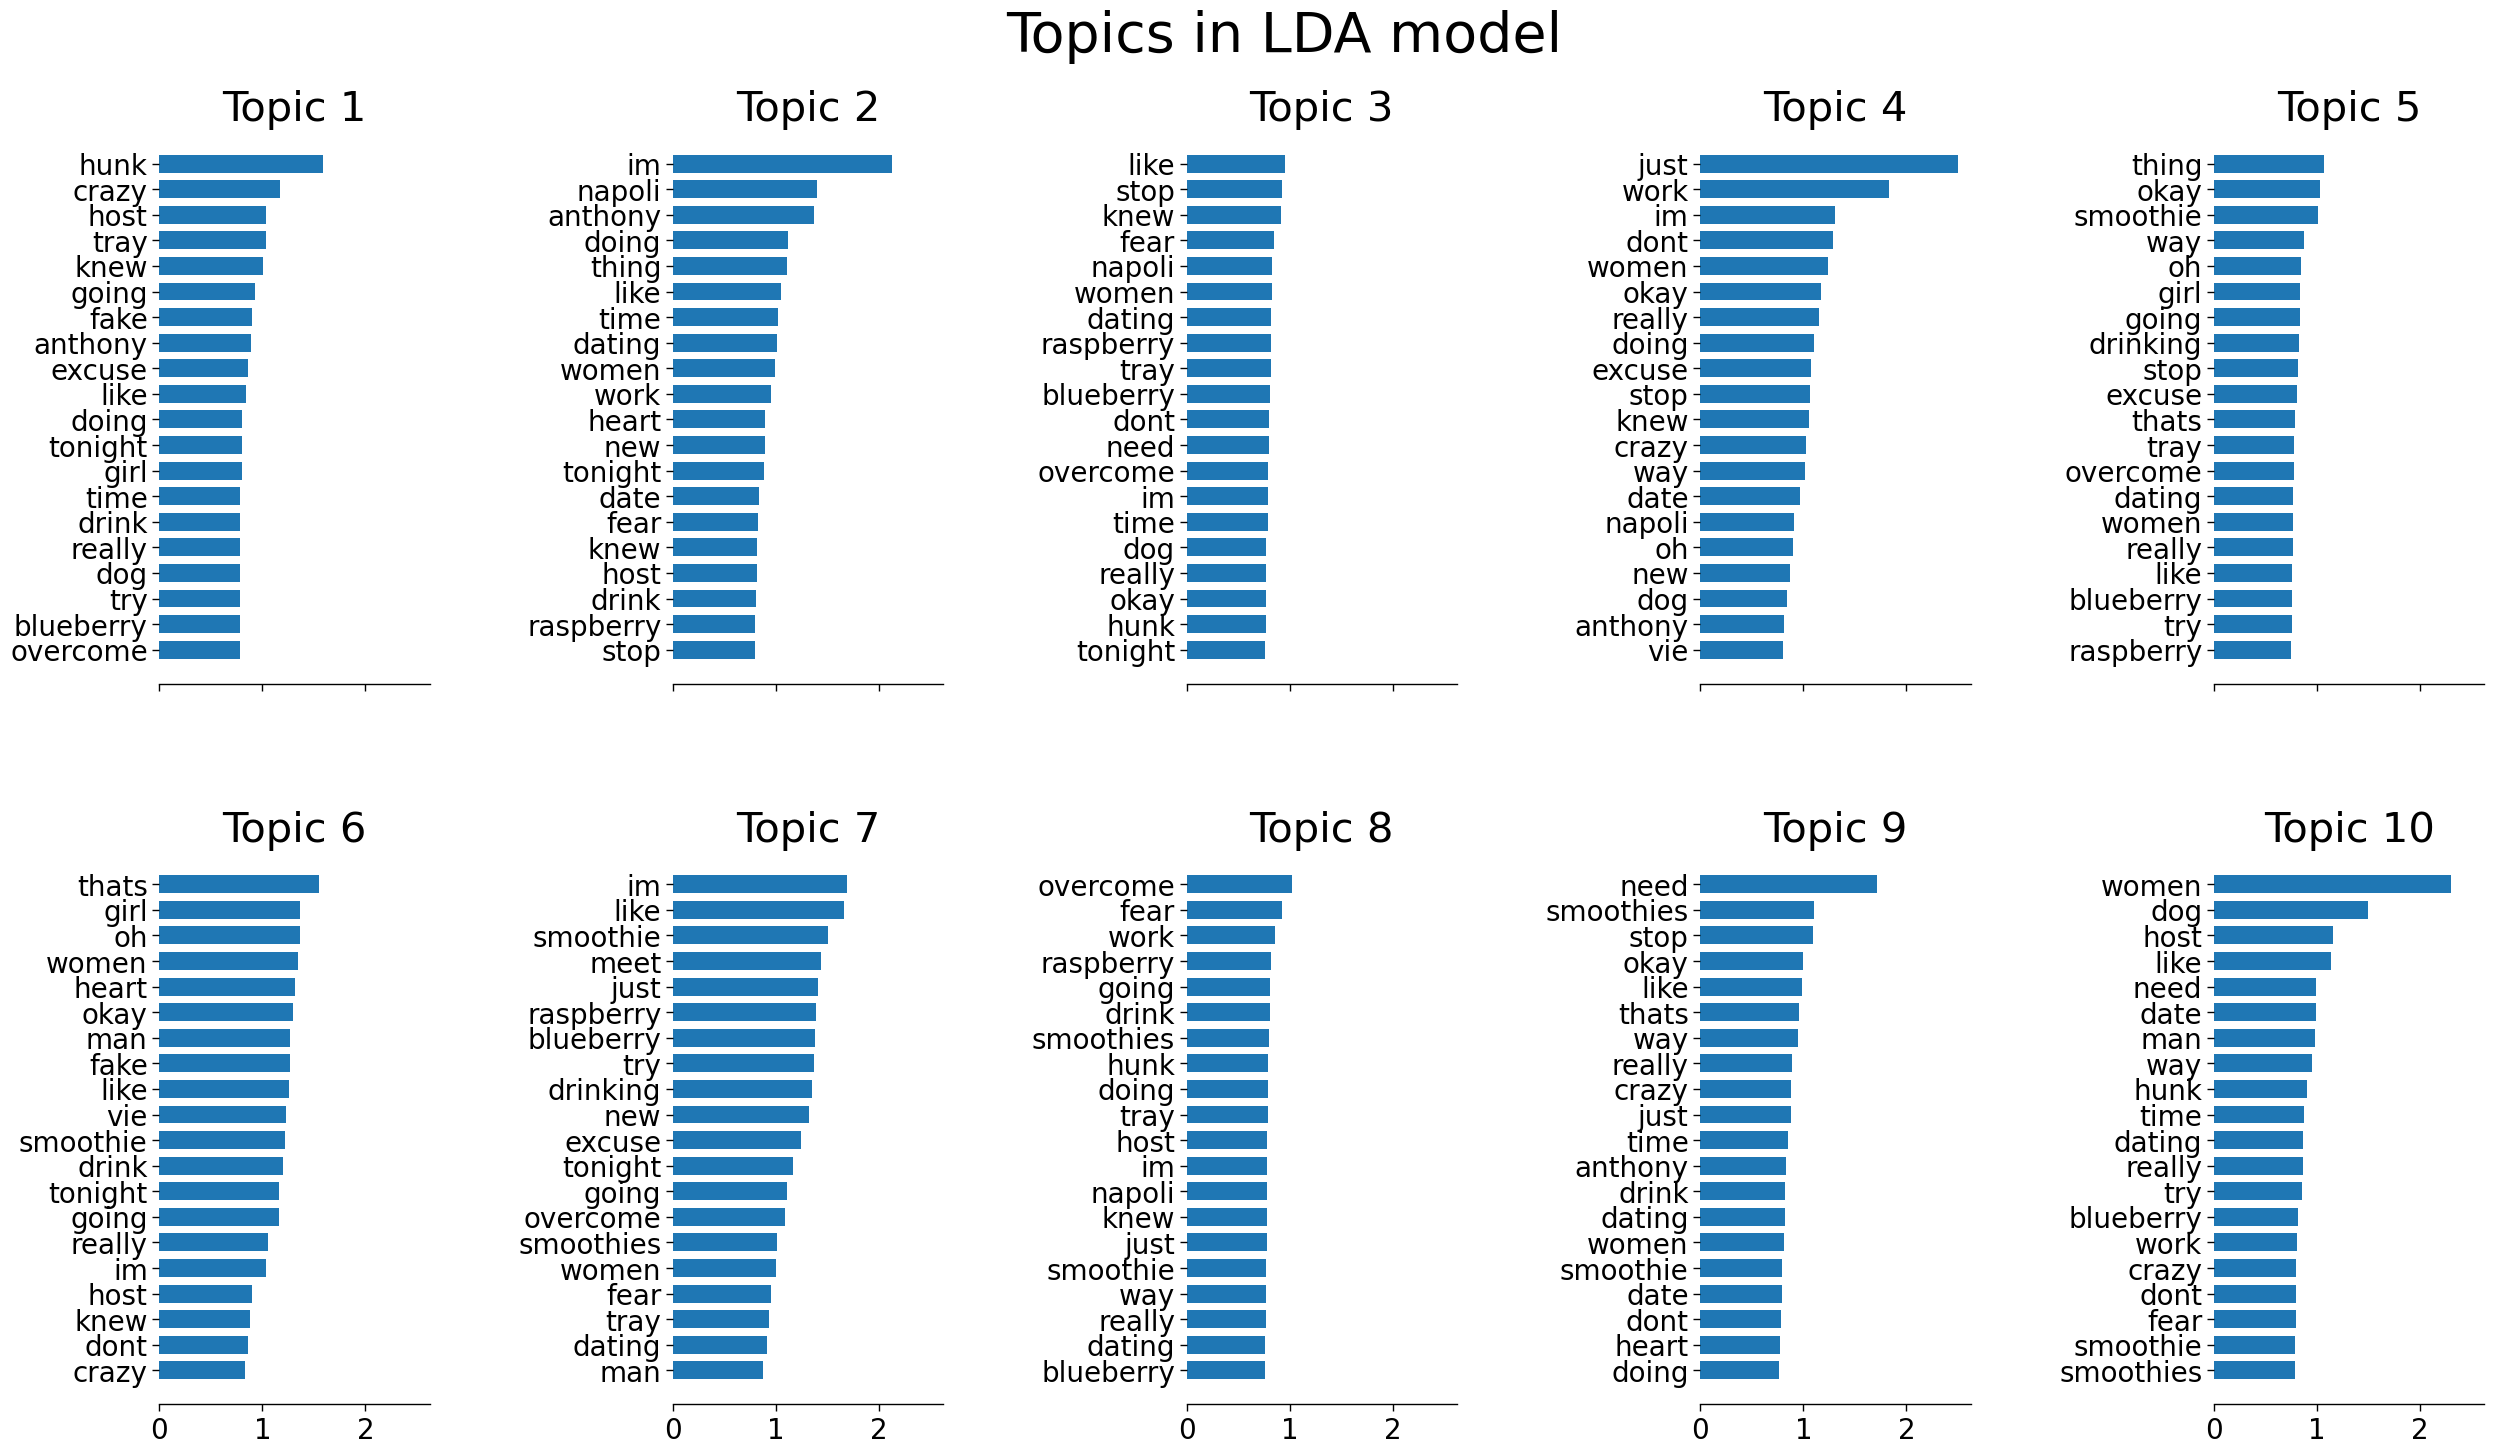

In [257]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)

tf = tf_vectorizer.fit_transform(transcript_ts["Text_cleaned"])

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [243]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=1000, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(transcript_ts["Text_cleaned"])


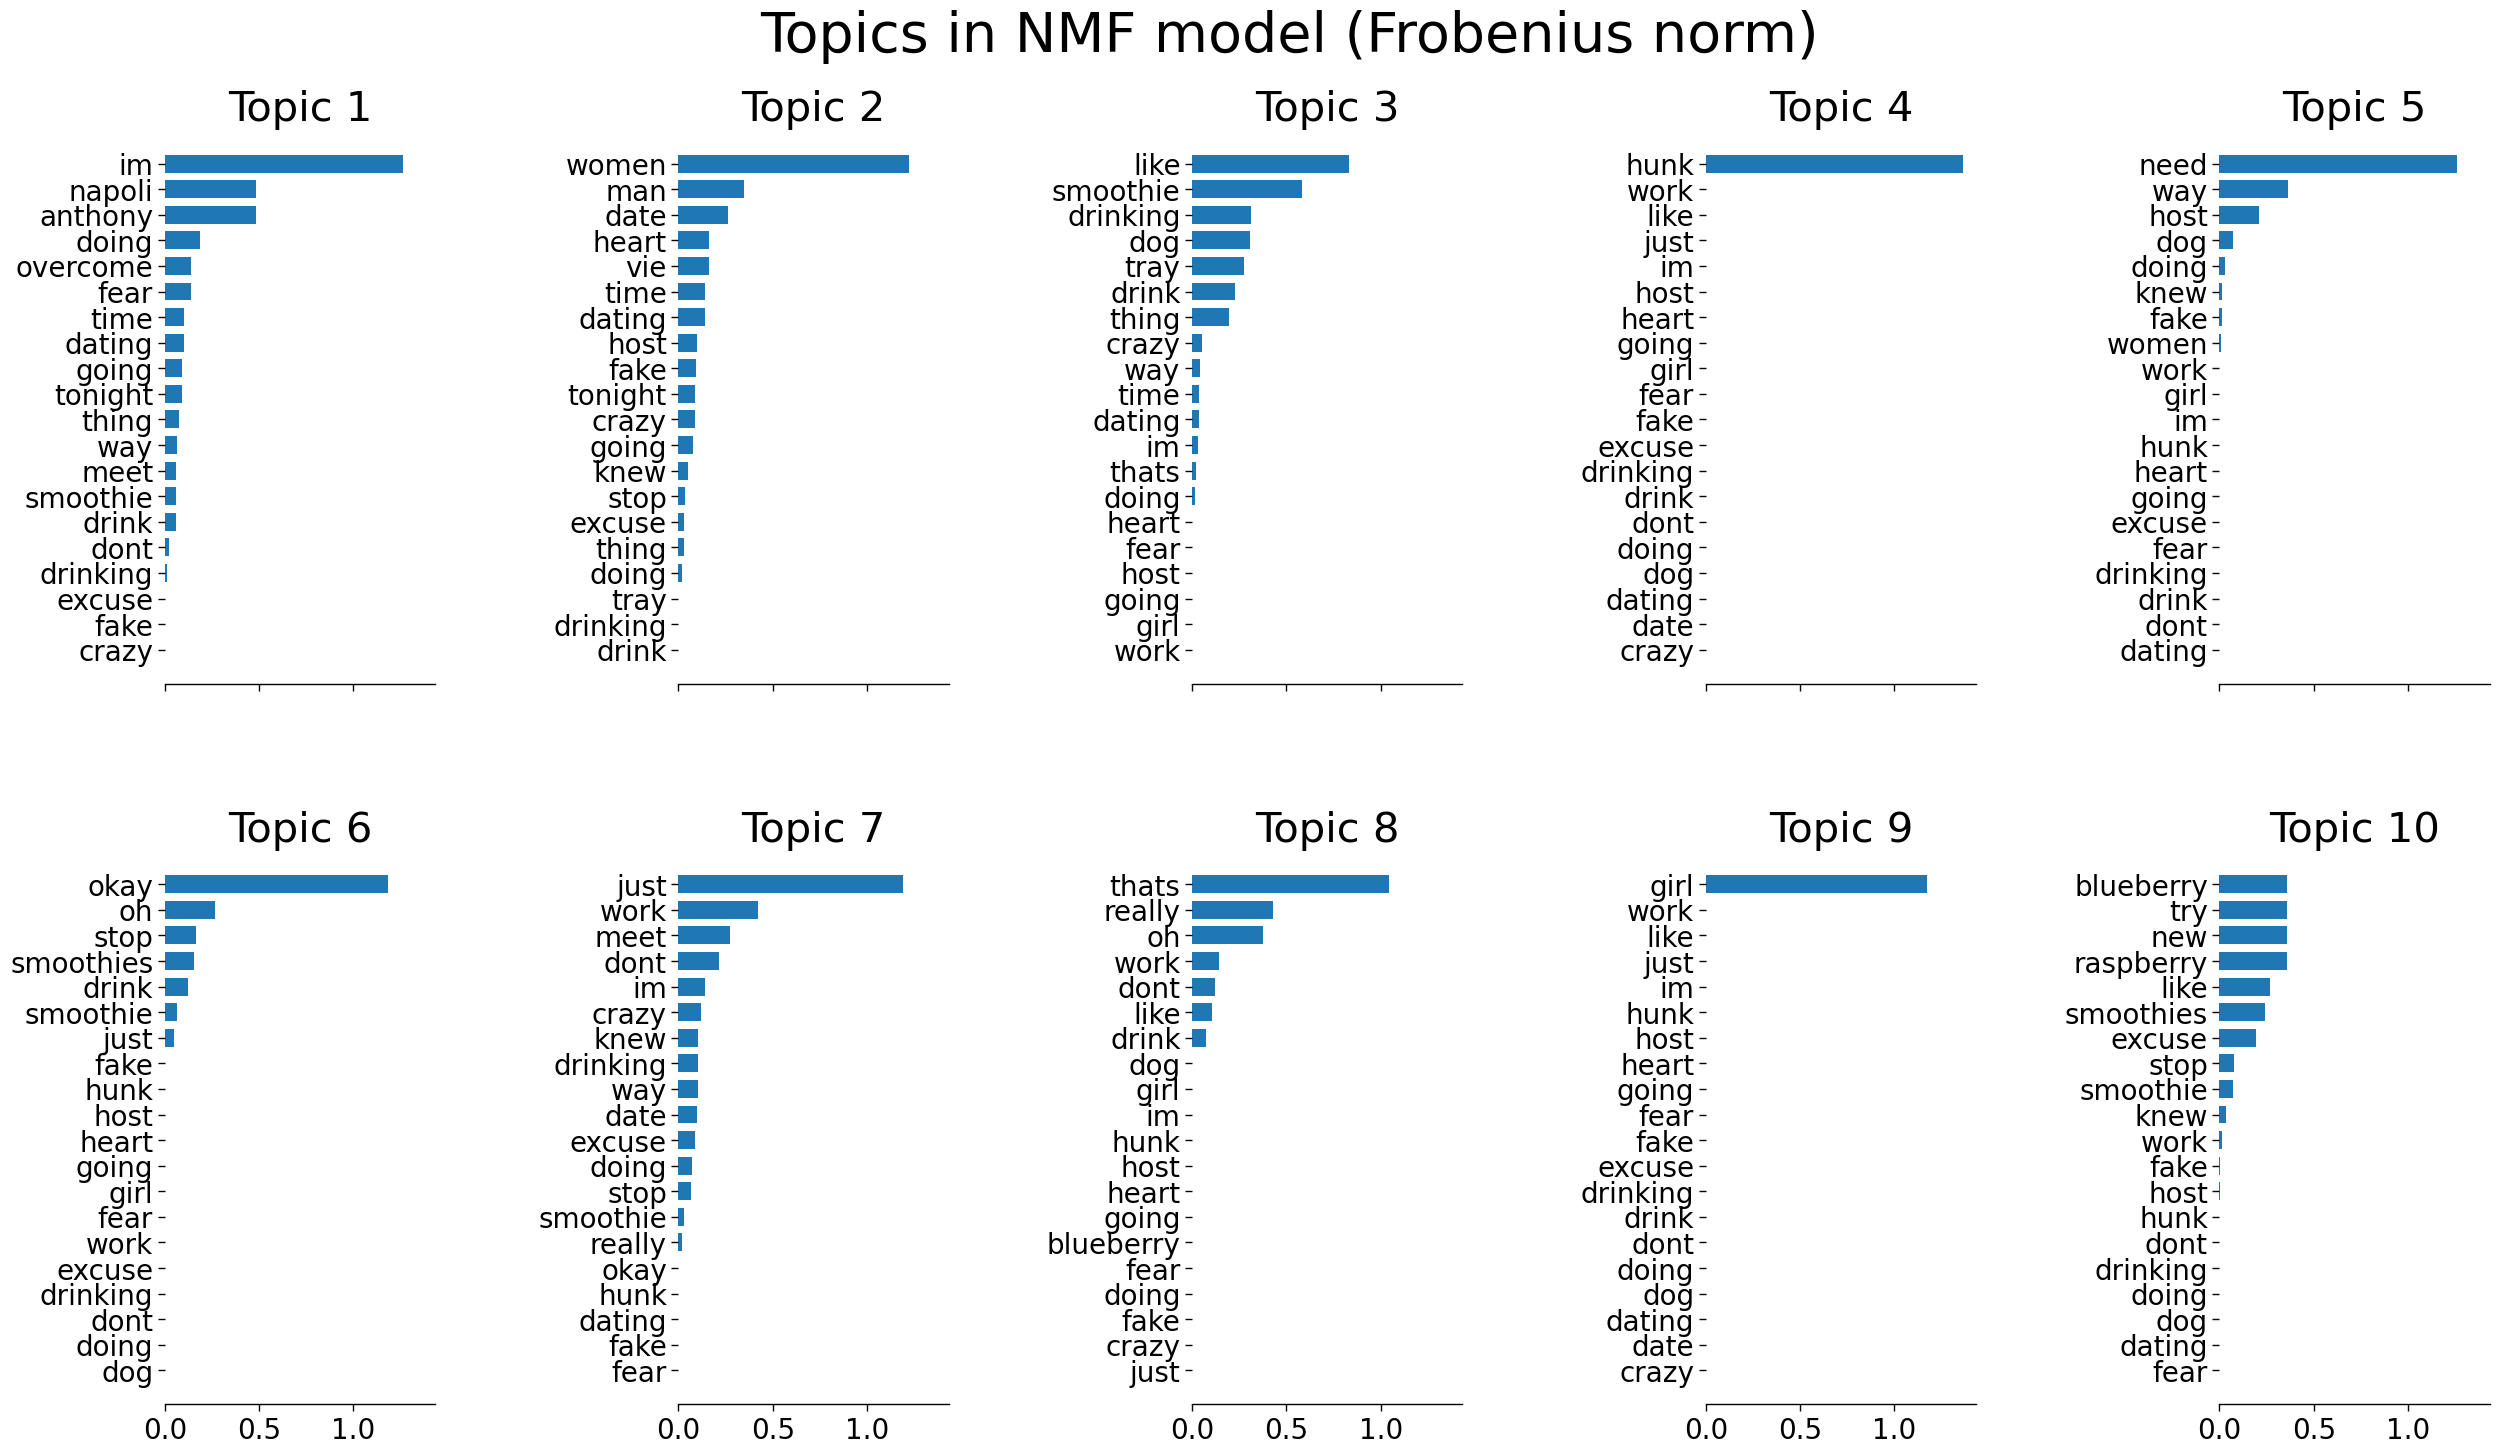

In [253]:
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

In [238]:
# convert article to documents
document = sent_tokenize(result["text"])

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english').fit_transform(document)

# Apply NMF
num_topics = 5  # Set the number of topics you want to identify
nmf_model = NMF(n_components=num_topics, init='random', random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_vectorizer)

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

In [239]:
nmf_matrix

array([[0.00000000e+00, 1.65734153e-18, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.79970448e-02, 1.98820965e-02, 7.55872637e-07, 0.00000000e+00,
        5.39417403e-03],
       [9.08387143e-03, 2.25143028e-02, 4.09035801e-07, 0.00000000e+00,
        5.72266551e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.42709544e-14,
        0.00000000e+00],
       [0.00000000e+00, 2.96545656e-03, 9.50107282e-08, 0.00000000e+00,
        2.59137718e-03],
       [2.09018688e-03, 2.59364842e-02, 5.02881391e-07, 0.00000000e+00,
        2.86139614e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78197818e-14,
        0.00000000e+00],
       [4.47097741e-02, 2.21327086e-02, 1.12780276e-06, 0.00000000e+00,
        3.13658541e-03],
       [0.00000000e+00, 2.64223294e-02, 3.45808424e-07, 0.00000000e+00,
        1.85299312e-01],
       [0.00000000e+00, 0.00000000e+00, 2.86503329e-18, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.0000

In [187]:
transcript_ts

,Text,Start_time,End_time,Text_clean,neg,neu,pos,Text_cleaned,tokens,lemmas
0,"When you look at me, you probably see a guy w...",0.0,3.2,"look , probably see guy .",0.000,1.000,0.000,when you look at me you probably see a guy w...,"[look, probably, see, guy]","[look, probably, see, guy]"
1,"But really, there's a large part of me that's...",3.8,8.32,"really , 's large part 's immature underdevelo...",0.000,1.000,0.000,but really theres a large part of me thats i...,"[really, theres, large, part, thats, immature,...","[really, there, s, large, part, that, s, immat..."
2,especially when it comes to women.,8.38,10.4,especially come woman .,0.000,1.000,0.000,especially when it comes to women,"[especially, comes, women]","[especially, come, woman]"
3,"Every girl I liked growing up rejected me,",11.58,14.0,"every girl liked growing rejected ,",0.337,0.204,0.459,every girl i liked growing up rejected me,"[every, girl, liked, growing, rejected]","[every, girl, like, grow, reject]"
4,"and because of that, I've grown into a man wh...",14.34,18.5,", 've grown man chronically nervous around wom...",0.259,0.741,0.000,and because of that ive grown into a man who...,"[ive, grown, man, chronically, nervous, around...","[I, ve, grow, man, chronically, nervous, aroun..."
...,...,...,...,...,...,...,...,...,...,...
64,Will they find love?,182.14,183.2,find love ?,0.000,0.192,0.808,will they find love,"[find, love]","[find, love]"
65,Will they find their soulmate?,183.74,185.18,find soulmate ?,0.000,0.204,0.796,will they find their soulmate,"[find, soulmate]","[find, soulmate]"
66,I'm Anthony Napoli.,185.82,186.84,'m anthony napoli .,0.000,1.000,0.000,im anthony napoli,"[im, anthony, napoli]","[I, m, anthony, napoli]"
67,This is The Hunk.,187.3,188.66,hunk .,0.000,1.000,0.000,this is the hunk,[hunk],[hunk]


In [189]:
'\w+|\$[\d\.]+|\S+'



  '\w+|\$[\d\.]+|\S+'



'\\w+|\\$[\\d\\.]+|\\S+'

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=5)

# apply transformation
tf = vectorizer.fit_transform(transcript_ts['Text_cleaned']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()

In [217]:
tf_feature_names

array(['and', 'but', 'im', 'it', 'just', 'like', 'me', 'my', 'of', 'okay',
       'one', 'smoothie', 'so', 'that', 'the', 'this', 'to', 'was',
       'women', 'would', 'you'], dtype=object)

In [218]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [219]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [220]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [221]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,to,6.1,so,3.1,it,3.6,to,12.7,my,8.8,okay,5.1,the,7.1,im,11.1,this,0.1,this,0.1
1,the,5.1,one,2.1,just,3.1,you,8.5,like,5.1,you,2.7,and,2.1,to,5.8,to,0.1,to,0.1
2,was,5.1,to,0.1,me,2.2,me,8.0,smoothie,3.9,like,2.1,but,2.1,the,5.1,you,0.1,you,0.1
3,women,4.1,but,0.1,to,2.2,and,4.1,that,3.1,would,2.1,it,2.1,just,4.1,it,0.1,it,0.1
4,it,3.1,women,0.1,but,2.1,this,3.1,you,2.1,one,2.1,women,2.1,my,2.3,me,0.1,me,0.1
5,one,3.1,the,0.1,was,2.1,that,3.1,to,1.2,to,1.6,would,2.1,you,2.1,of,0.1,of,0.1
6,my,2.2,this,0.1,women,1.3,of,3.1,of,1.1,smoothie,1.3,this,1.1,so,2.1,but,0.1,but,0.1
7,of,2.1,you,0.1,would,1.1,women,2.9,but,1.1,me,1.1,one,0.1,and,2.1,women,0.1,women,0.1
8,this,1.1,it,0.1,the,1.1,it,2.6,just,0.1,just,1.1,to,0.1,this,1.1,and,0.1,and,0.1
9,and,1.1,me,0.1,and,0.1,but,1.1,was,0.1,of,0.1,you,0.1,of,1.1,just,0.1,just,0.1


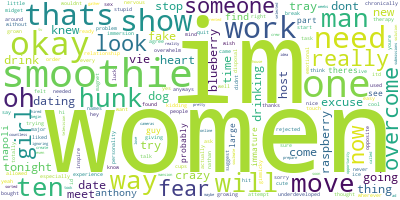

In [223]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(transcript_ts['Text_cleaned'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [225]:

import pyLDAvis

In [227]:
LDAvis_prepared = pyLDAvis.prepare(lda_model, corpus, id2word)

TypeError: prepare() missing 2 required positional arguments: 'vocab' and 'term_frequency'

In [ ]:
pyLDAvis.display(movies_vis_data)